<a href="https://colab.research.google.com/github/amitshahasurja719/new/blob/master/italy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/Italy.csv')
data.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
np.set_printoptions(suppress = True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
data.drop("SNo", axis = 1, inplace = True)
data.drop("Country", axis = 1, inplace = True)
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,13,Abruzzo,42.35,13.40,0,0,0,0,0,0,0,0,0,nan
1,2020-02-24T18:00:00,17,Basilicata,40.64,15.81,0,0,0,0,0,0,0,0,0,nan
2,2020-02-24T18:00:00,21,P.A. Bolzano,46.50,11.36,0,0,0,0,0,0,0,0,0,nan
3,2020-02-24T18:00:00,18,Calabria,38.91,16.59,0,0,0,0,0,0,0,0,0,nan
4,2020-02-24T18:00:00,15,Campania,40.84,14.25,0,0,0,0,0,0,0,0,0,nan


In [ ]:
data.isnull().sum()

Date                            0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [ ]:
data['TestsPerformed'].fillna(0, inplace = True)
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,13,Abruzzo,42.35,13.40,0,0,0,0,0,0,0,0,0,0.00
1,2020-02-24T18:00:00,17,Basilicata,40.64,15.81,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-24T18:00:00,21,P.A. Bolzano,46.50,11.36,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-24T18:00:00,18,Calabria,38.91,16.59,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-24T18:00:00,15,Campania,40.84,14.25,0,0,0,0,0,0,0,0,0,0.00


In [ ]:
data.isnull().sum()

Date                         0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data['RegionName'] = lbl.fit_transform(data['RegionName'])
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,13,0,42.35,13.40,0,0,0,0,0,0,0,0,0,0.00
1,2020-02-24T18:00:00,17,1,40.64,15.81,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-24T18:00:00,21,11,46.50,11.36,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-24T18:00:00,18,2,38.91,16.59,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-24T18:00:00,15,3,40.84,14.25,0,0,0,0,0,0,0,0,0,0.00


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.datetime.toordinal)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,737479,13,0,42.35,13.40,0,0,0,0,0,0,0,0,0,0.00
1,737479,17,1,40.64,15.81,0,0,0,0,0,0,0,0,0,0.00
2,737479,21,11,46.50,11.36,0,0,0,0,0,0,0,0,0,0.00
3,737479,18,2,38.91,16.59,0,0,0,0,0,0,0,0,0,0.00
4,737479,15,3,40.84,14.25,0,0,0,0,0,0,0,0,0,0.00


In [ ]:
data = data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0.00,0.57,0.00,0.51,0.64,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
1,0.00,0.76,0.05,0.30,0.89,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
2,0.00,0.95,0.55,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
3,0.00,0.81,0.10,0.09,0.97,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
4,0.00,0.67,0.15,0.32,0.73,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00


In [ ]:
X = data[['HomeConfinement', 'Deaths', 'CurrentPositiveCases', 'Recovered', 'TestsPerformed']]
Y = data['TotalPositiveCases']

In [ ]:
x = X.values
y = Y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(8, activation='relu', input_shape=(5,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/30
1984/1984 [==============================] - 0s 82us/step - loss: 0.0223
Epoch 2/30
1984/1984 [==============================] - 0s 34us/step - loss: 0.0025
Epoch 3/30
1984/1984 [==============================] - 0s 34us/step - loss: 5.1383e-04
Epoch 4/30
1632/1984 [=======================>......] - ETA: 0s - loss: 3.8192e-04

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1984/1984 [==============================] - 0s 37us/step - loss: 3.7491e-04
Epoch 5/30
1984/1984 [==============================] - 0s 33us/step - loss: 3.2152e-04
Epoch 6/30
1984/1984 [==============================] - 0s 33us/step - loss: 2.7375e-04
Epoch 7/30
1984/1984 [==============================] - 0s 32us/step - loss: 2.3909e-04
Epoch 8/30
1984/1984 [==============================] - 0s 32us/step - loss: 2.0476e-04
Epoch 9/30
1984/1984 [==============================] - 0s 37us/step - loss: 1.7615e-04
Epoch 10/30
1984/1984 [==============================] - 0s 33us/step - loss: 1.5391e-04
Epoch 11/30
1984/1984 [==============================] - 0s 32us/step - loss: 1.4295e-04
Epoch 12/30
1984/1984 [==============================] - 0s 35us/step - loss: 1.3004e-04
Epoch 13/30
1984/1984 [==============================] - 0s 34us/step - loss: 1.2088e-04
Epoch 14/30
1984/1984 [==============================] - 0s 34us/step - loss: 1.1689e-04
Epoch 15/30
1984/1984 [===============

In [ ]:
from sklearn import metrics
pred = model.predict(x_test)  
MSE = metrics.mean_squared_error(pred, y_test)
print("Final score (MSE): {:.10f}".format(MSE))

Final score (MSE): 0.0000285762


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(RMSE))

Final score (RMSE): 0.005345671204140041


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

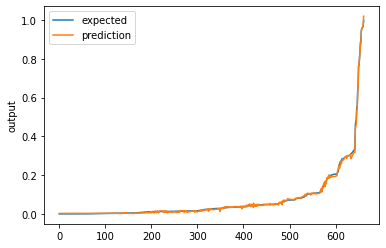

In [ ]:
chart_regression(pred.flatten(),y_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred, multioutput='variance_weighted')

0.9986223373266535